In [1]:
from __future__ import print_function, division
import os, bz2, json, time, sys, csv
from datetime import timedelta, datetime

import math
import collections
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy.stats as stats

from matplotlib import pyplot as plt
from tqdm import tqdm

from util_read import engage_read, read_vids, engage_tweets_read, merge_engage_tweets, engage_metadata, compute_period_daily

In [2]:
file_vids_filter_all = "/home/users/u6314203/pyProject/hip-popularity/data/engage16/filtered/vids_filter_all.csv" 
engage_dataset_base = "/localdata/u6314203/dataset_engage16/tweeted_videos" 
tweets_dataset_base = "/localdata/u6314203/dataset_tweets_engage/dataset_tweets_fixTZ"

# file_vids_filter_all = "C:/Users/u6314203/pyProjects/hip-popularity/data/engage16/filtered/vids_filter_all.csv"
# engage_dataset_base = "G:/MLCV dataset/engagement'16/tweeted_videos"
# tweets_dataset_base = "G:/MLCV dataset/engagement'16/tweets_dataset_fixTZ"

categories_eligible = ["autos", "comedy","education","entertainment", \
                       "film","gaming","howto","music",\
                       "news","people","science","sports",\
                       "travel"]

In [4]:
# vids from all category
vids_filter_all = read_vids(file_vids_filter_all)

dataset = dict()
# engage_metadata = dict() 
for category in categories_eligible[:]:
    engage_dataset = engage_read(engage_dataset_base, category)    
    dataset.update(engage_dataset)
    
print(f"Total size: {len(dataset)}")

Vids(filtered) in each category:
autos:25712; comedy:31741; education:41191; entertainment:180128; film:43101; gaming:222236; howto:61027; music:118094; news:38249; people:222658; science:32278; sports:39649; travel:13112
Engage autos size: 25139
Engage comedy size: 31519
Engage education size: 40311
Engage entertainment size: 177236
Engage film size: 42439
Engage gaming size: 219709
Engage howto size: 59965
Engage music size: 116884
Engage news size: 37508
Engage people size: 220100
Engage science size: 31899
Engage sports size: 39129
Engage travel size: 12921
Total size: 1054759


In [12]:
vids = []
rows = []

for vid, vals in dataset.items():
    vids.append(vid)
    
    days = vals["days"]
    his_len = len(days) 
    final_day = days[-1]
    rows.append([his_len, final_day])

df = pd.DataFrame(rows, columns=["history length", "final day"], index=vids)
pd.DataFrame.describe(df)

,history length,final day
count,1.054759e+06,1.054759e+06
mean,2.901436e+02,2.930943e+02
std,1.329206e+01,1.346336e+01
min,2.700000e+02,2.690000e+02
25%,2.790000e+02,2.820000e+02
50%,2.890000e+02,2.930000e+02
75%,3.000000e+02,3.030000e+02
max,3.280000e+02,3.270000e+02


In [13]:
df.head()

,history length,final day
nw6iUh-MxBk,285,302
LUu6lxQy36w,304,303
8iIKb8oYT5k,274,295
5PF88VYGBBg,297,296
kdSNY2_gYuk,288,303


In [14]:
ratio = (df["history length"])/(df["final day"])
pd.DataFrame.describe(ratio)

count    1.054759e+06
mean     9.902931e-01
std      2.561076e-02
min      8.256881e-01
25%      9.897959e-01
50%      1.003268e+00
75%      1.003484e+00
max      1.003717e+00
dtype: float64

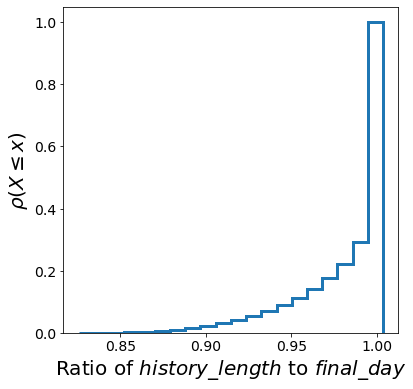

In [33]:
plt.rcParams.update({'axes.labelsize': 20, 
                     'xtick.labelsize': 14,
                     'ytick.labelsize': 14})

fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(1,1,1)
ax.hist(ratio, bins=20, density=True, cumulative=1, histtype='step', linewidth=3)
ax.set_xlabel("Ratio of $\it{history\_length}$ to $\it{final\_day}$")
ax.set_ylabel(r'$\rho (X \leq x)$',)

fig.savefig("figs/sparsenessAfterRemoval.pdf", bbox_inches='tight')